In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import OrderedDict

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, pairwise_distances
from sklearn.model_selection import train_test_split

Step by step:
1. Load .csv
2. Fill missing values
3. Clean data
4. 

- user_total_review_count: jumlah review yang diberikan user X
- review_length: panjang teks review
- user_fake_review = Flag userid yg melakukan fake review ditemukan di review yg berbeda.
- product_fake_review = Flag product kalo produk ini dapet fake review
- review_date = convert dari timestamp ke date

- Similar reviews posted in the same time interval

https://github.com/Swathiu/Detecting-Fake-Reviews
https://github.com/darshandagly/Fake-Review-Detection

https://towardsdatascience.com/sentiment-classification-using-logistic-regression-in-pytorch-e0c43de9eb66

In [44]:
df = pd.read_csv("train_review_only.csv") #baca dataset

In [45]:
df.head()

,anonymous,author_shopid,author_username,cat_id,cmtid,comment,count_rating_with_image,count_with_context,ctime,editable,...,rating_count0,rating_count1,rating_count2,rating_count3,rating_count4,rating_count5,rating_star,shop_id,userid,fakeornot
0,False,80294228,icanursarah,2902,2327971512,"Hp sampai dengan selamat, berfungsi dengan baik, tiada kendala Alhamdulillah, semoga awet dan mantap jiwaa",922,2182,1588431497,1,...,7274,89,15,44,88,9088,5,15168157,80295702,fake
1,False,80294228,icanursarah,2902,2325993622,Mantabbagusmantabbagus yuhuuy\r\nRecommended seller yuhuuuyyy,922,2182,1588403926,1,...,7274,89,15,44,88,9088,5,15168157,80295702,fake
2,False,80294228,icanursarah,2902,2325999143,Mantabbagusmantabbagus yuhuuy\r\nRecommended seller yuhuuuyyy,922,2182,1588403984,1,...,7274,89,15,44,88,9088,5,15168157,80295702,fake
3,False,80294228,icanursarah,2902,2326001075,Mantabbagusmantabbagus yuhuuy\r\nRecommended seller yuhuuuyyy,922,2182,1588404004,1,...,7274,89,15,44,88,9088,5,15168157,80295702,fake
4,False,16191982,rrp0811,2678,2361588821,Ini paket pertamaku beli disini.\r\nCepat\r\nTanggap\r\nAkurat\r\nTepat\r\nBagus\r\nOke\r\nSemoga aja tanpa ada masalah ditengah jalan.\r\n\r\nJsjsjjdjdhshwjshzvzvvzhajaoaozoozooaooeorodozbbzbzbajzjbzbzbzbzbBzbxbnakzlzkbdbskzkxbsboazkebbdjawbdboXbjslcksnabbzbjajzbsbznskLakzbxbzbajsjsjkxjxxbsbebbxbxbxbsbwjaoaowopspxllLNcbsbjwj,284,680,1589011931,1,...,1316,2,4,1,44,3584,5,134248812,16193318,fake


In [46]:
df.describe()

,author_shopid,cat_id,cmtid,count_rating_with_image,count_with_context,ctime,editable,item_id,mtime,orderid,rating,rating_count0,rating_count1,rating_count2,rating_count3,rating_count4,rating_count5,rating_star,shop_id,userid
count,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,0.0,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,9.165345e+07,2678.650000,2.313313e+09,715.080000,1259.940000,1.587748e+09,0.880000,3.835310e+09,1.587779e+09,NaN,0.83000,5463.27000,132.670000,15.98000,31.050000,87.550000,6961.970000,4.640000,8.219773e+07,9.165527e+07
std,7.629192e+07,577.913442,1.778786e+08,861.705083,1372.139941,4.372252e+06,0.477367,2.092785e+09,4.334472e+06,NaN,0.55149,6198.81407,224.825681,24.49159,42.989399,116.007347,8529.522252,1.123846,5.879091e+07,7.629268e+07
min,3.614449e+06,42.000000,1.414417e+09,0.000000,5.000000,1.564130e+09,0.000000,8.451010e+08,1.564130e+09,NaN,-1.00000,17.00000,0.000000,0.00000,0.000000,0.000000,14.000000,1.000000,1.912337e+06,3.615821e+06
25%,2.942194e+07,2160.000000,2.319222e+09,42.750000,56.000000,1.588259e+09,1.000000,2.354260e+09,1.588259e+09,NaN,1.00000,254.50000,1.750000,0.00000,0.750000,2.750000,148.000000,5.000000,1.978175e+07,2.942333e+07
50%,8.029423e+07,2580.000000,2.338198e+09,284.000000,680.000000,1.588655e+09,1.000000,2.767211e+09,1.588655e+09,NaN,1.00000,1551.00000,10.000000,4.00000,4.500000,20.000000,2449.500000,5.000000,7.401964e+07,8.029570e+07
75%,1.188133e+08,2902.000000,2.422795e+09,922.000000,2182.000000,1.589964e+09,1.000000,5.505998e+09,1.589964e+09,NaN,1.00000,10259.00000,89.000000,15.00000,44.000000,96.000000,9088.000000,5.000000,1.561384e+08,1.188151e+08
max,2.676015e+08,3960.000000,2.463434e+09,2412.000000,3626.000000,1.590795e+09,2.000000,7.832626e+09,1.590795e+09,NaN,1.00000,16647.00000,612.000000,67.00000,113.000000,309.000000,23513.000000,5.000000,1.720565e+08,2.676048e+08


In [47]:
# Check null values
df.isna().sum()

anonymous                  0  
author_shopid              0  
author_username            0  
cat_id                     0  
cmtid                      0  
comment                    0  
count_rating_with_image    0  
count_with_context         0  
ctime                      0  
editable                   0  
item_id                    0  
mtime                      0  
orderid                    100
product_title              0  
rating                     0  
rating_count0              0  
rating_count1              0  
rating_count2              0  
rating_count3              0  
rating_count4              0  
rating_count5              0  
rating_star                0  
shop_id                    0  
userid                     0  
fakeornot                  0  
dtype: int64

In [48]:
del df['orderid']

In [49]:
df['fakeornot'].value_counts()

fake        51
original    49
Name: fakeornot, dtype: int64

In [50]:
# Preprocessing
# Lowercase
df['comment'] = df.apply(lambda row: str(row['comment']).lower(), axis=1)

In [51]:
# Preprocessing
# Remove Punctuations
tokenizer = RegexpTokenizer(r'\w+')
df['comment'] = df['comment'].apply(lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

In [52]:
# Feature Engineering
df['review_length'] = df['comment'].apply(lambda x: len(x.split()))

In [53]:
# Convert UNIX timestamp to date and time
df['date'] = pd.to_datetime(df['ctime'],unit='s').dt.date
df['time'] = pd.to_datetime(df['ctime'],unit='s').dt.time

In [54]:
# Maximum Number of Reviews per day per reviewer
mnr_df1 = df[['userid', 'date']].copy()
mnr_df2 = mnr_df1.groupby(by=['date', 'userid']).size().reset_index(name='mnr')
mnr_df2['mnr'] = mnr_df2['mnr'] / mnr_df2['mnr'].max()
df = df.merge(mnr_df2, on=['userid', 'date'], how='inner')

In [55]:
# Maximum cosine similarity
review_data = df
res = OrderedDict()

# Iterate over data and create groups of reviewers
for row in review_data.iterrows():
    if row[1].userid in res:
        res[row[1].userid].append(row[1].comment)
    else:
        res[row[1].userid] = [row[1].comment]

individual_reviewer = [{'userid': k, 'comment': v} for k, v in res.items()]
df2 = dict()
df2['userid'] = pd.Series([])
df2['Maximum Content Similarity'] = pd.Series([])
vector = TfidfVectorizer(min_df=0)
count = -1
for reviewer_data in individual_reviewer:
    count = count + 1
    try:
        tfidf = vector.fit_transform(reviewer_data['comment'])
    except:
        pass
    cosine = 1 - pairwise_distances(tfidf, metric='cosine')

    np.fill_diagonal(cosine, -np.inf)
    max = cosine.max()

    # To handle reviewier with just 1 review
    if max == -np.inf:
        max = 0
    df2['userid'][count] = reviewer_data['userid']
    df2['Maximum Content Similarity'][count] = max

df3 = pd.DataFrame(df2, columns=['userid', 'Maximum Content Similarity'])

In [56]:
# left outer join on original datamatrix and cosine dataframe
df = pd.merge(review_data, df3, on="userid", how="left")
df.drop(index=np.where(pd.isnull(df))[0], axis=0, inplace=True)

In [57]:
df.drop(['anonymous', 'author_shopid', 'author_username', 'cat_id', 'date', 'time',
         'cmtid', 'comment', 'count_rating_with_image', 'count_with_context', 
         'ctime', 'editable', 'item_id', 'mtime', 'product_title', 
         'rating', 'rating_count0', 'rating_count0', 'rating_count1', 'rating_count2', 
         'rating_count3', 'rating_count4', 'rating_count5', 'rating_star', 'shop_id', 'userid'], axis=1, inplace=True)

In [58]:
X = df[['review_length', 'mnr', 'Maximum Content Similarity']]
y = df['fakeornot']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [60]:
c_val = [0.75, 1, 2, 3, 4, 5, 10]

for c in c_val:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, logreg.predict(X_test))))

Accuracy for C=0.75: 0.7666666666666667
Accuracy for C=1: 0.7666666666666667
Accuracy for C=2: 0.8333333333333334
Accuracy for C=3: 0.8333333333333334
Accuracy for C=4: 0.8333333333333334
Accuracy for C=5: 0.8333333333333334
Accuracy for C=10: 0.8333333333333334


In [61]:
confusionMatrix = confusion_matrix(y_test, logreg.predict(X_test))
confusionMatrix

array([[12,  5],
       [ 0, 13]], dtype=int64)

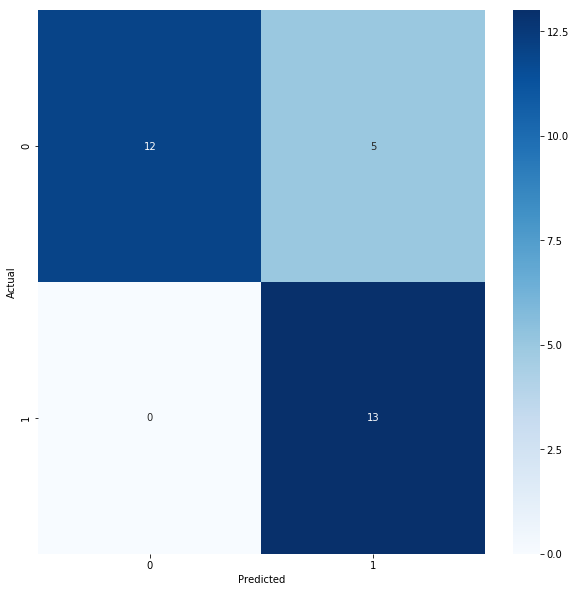

In [62]:
confusionMatrix = pd.DataFrame(confusionMatrix, index=[0,1], columns=[0,1])
confusionMatrix.index.name = 'Actual'
confusionMatrix.columns.name = 'Predicted'

plt.figure(figsize = (10,10))
sns.heatmap(confusionMatrix, cmap= "Blues",annot = True, fmt='')

In [63]:
predicted = logreg.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test, predicted)))
print('Precision Score : ' + str(precision_score(y_test, predicted, pos_label="original")))
print('Recall Score : ' + str(recall_score(y_test, predicted, pos_label="original")))
print('F1 Score : ' + str(f1_score(y_test, predicted, pos_label="original")))

Accuracy Score : 0.8333333333333334
Precision Score : 0.7222222222222222
Recall Score : 1.0
F1 Score : 0.8387096774193548


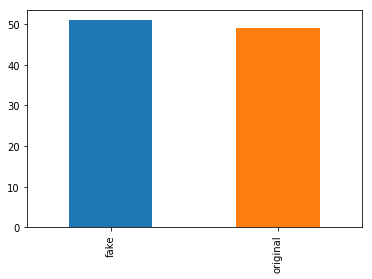

In [64]:
df['fakeornot'].value_counts().plot(kind='bar')

In [65]:
test = pd.read_csv("review_shopee.csv")

In [66]:
test['comment'] = test.apply(lambda row: str(row['comment']).lower(), axis=1)

In [67]:
# Preprocessing
# Remove Punctuations
tokenizer = RegexpTokenizer(r'\w+')
test['comment'] = test['comment'].apply(lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

In [68]:
# Feature Engineering
test['review_length'] = test['comment'].apply(lambda x: len(x.split()))

# Convert UNIX timestamp to date and time
test['date'] = pd.to_datetime(test['ctime'],unit='s').dt.date
test['time'] = pd.to_datetime(test['ctime'],unit='s').dt.time

# Maximum Number of Reviews per day per reviewer
mnr_df1 = test[['userid', 'date']].copy()
mnr_df2 = mnr_df1.groupby(by=['date', 'userid']).size().reset_index(name='mnr')
mnr_df2['mnr'] = mnr_df2['mnr'] / mnr_df2['mnr'].max()
test = test.merge(mnr_df2, on=['userid', 'date'], how='inner')

In [69]:
# Cosine Similarity
review_data = test
res = OrderedDict()

# Iterate over data and create groups of reviewers
for row in review_data.iterrows():
    if row[1].userid in res:
        res[row[1].userid].append(row[1].comment)
    else:
        res[row[1].userid] = [row[1].comment]

individual_reviewer = [{'userid': k, 'comment': v} for k, v in res.items()]
df2 = dict()
df2['userid'] = pd.Series([])
df2['Maximum Content Similarity'] = pd.Series([])
vector = TfidfVectorizer(min_df=0)
count = -1
for reviewer_data in individual_reviewer:
    count = count + 1
    try:
        tfidf = vector.fit_transform(reviewer_data['comment'])
    except:
        pass
    cosine = 1 - pairwise_distances(tfidf, metric='cosine')

    np.fill_diagonal(cosine, -np.inf)
    max = cosine.max()

    # To handle reviewier with just one review
    if max == -np.inf:
        max = 0
    df2['userid'][count] = reviewer_data['userid']
    df2['Maximum Content Similarity'][count] = max

df3 = pd.DataFrame(df2, columns=['userid', 'Maximum Content Similarity'])
# left outer join on original datamatrix and cosine dataframe
test = pd.merge(review_data, df3, on="userid", how="left")
df.drop(index=np.where(pd.isnull(df))[0], axis=0, inplace=True)

In [70]:
logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
test['fakeornot'] = 'none'

In [72]:
y_pred = logreg.predict(test[['review_length', 'mnr', 'Maximum Content Similarity']])
test['fakeornot'] = y_pred

In [73]:
test.head()

,anonymous,author_shopid,author_username,cat_id,cmtid,comment,count_rating_with_image,count_with_context,ctime,editable,...,rating_count5,rating_star,shop_id,userid,review_length,date,time,mnr,Maximum Content Similarity,fakeornot
0,False,15568078.0,partianadewi,3268.0,1.940509e+09,work tp proses lama,0.0,5.0,1.578476e+09,0.0,...,14.0,5.0,121336544.0,15569414.0,4,2020-01-08,09:36:53,0.034483,0.0,original
1,False,140322961.0,arvie2003,3268.0,1.925999e+09,respon cepat work dan proses agak lama,0.0,5.0,1.578085e+09,0.0,...,14.0,5.0,121336544.0,140324785.0,7,2020-01-03,21:03:30,0.034483,0.0,original
2,False,129737336.0,rama171200,3268.0,1.923213e+09,mantull work,0.0,5.0,1.578014e+09,0.0,...,14.0,5.0,121336544.0,129739160.0,2,2020-01-03,01:16:05,0.034483,0.0,original
3,False,60908796.0,tokkibaechu23,3268.0,1.942090e+09,nan,0.0,5.0,1.578507e+09,0.0,...,14.0,5.0,121336544.0,60910238.0,1,2020-01-08,18:03:41,0.034483,0.0,original
4,False,176362338.0,theosetyawan10,3268.0,1.941692e+09,nan,0.0,5.0,1.578494e+09,0.0,...,14.0,5.0,121336544.0,176364847.0,1,2020-01-08,14:38:05,0.034483,1.0,fake


In [74]:
# Export classifier result to .csv
# test.to_csv("output_test.csv", index=False, encoding='utf-8')

In [75]:
fake = test.fakeornot.str.count("fake").sum()
original = test.fakeornot.str.count("original").sum()

print(fake)
print(original)

906
3724


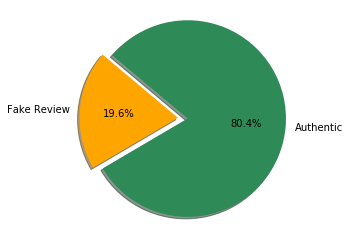

In [76]:
labels = ['Fake Review', 'Authentic',]
filter_opini = [fake, original]
colors = ['orange', 'seagreen']
explode = (0.1, 0)  # explode 1st slice

plt.pie(filter_opini, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

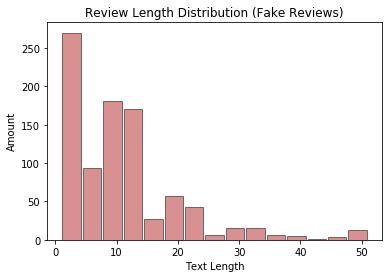

In [77]:
# Histogram
plt.hist(test['review_length'].loc[(test.fakeornot == 'fake')],rwidth=0.9,alpha=0.5,color='firebrick',bins=15,edgecolor='black') 

plt.xlabel('Text Length') 
plt.ylabel('Amount')
plt.title('Review Length Distribution (Fake Reviews)') 

plt.show()

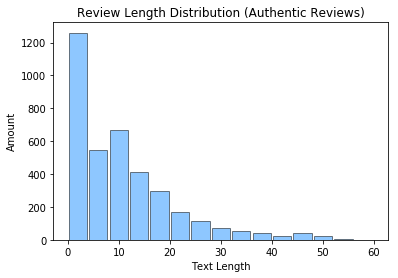

In [78]:
# Histogram
plt.hist(test['review_length'].loc[(test.fakeornot == 'original')],rwidth=0.9,alpha=0.5,color='dodgerblue',bins=15,edgecolor='black') 

plt.xlabel('Text Length') 
plt.ylabel('Amount')
plt.title('Review Length Distribution (Authentic Reviews)') 

plt.show()

In [79]:
pd.set_option('display.max_colwidth', -1)

In [80]:
test['comment'].loc[(test.fakeornot == 'fake')]

4       nan                                                                                                                                                                                                                                                                                                         
6       sangat memuaskan belanja di sini akun original indonesia harga murah penjual respon cepet                                                                                                                                                                                                                   
7       nan                                                                                                                                                                                                                                                                                                         
8       nan                                                              

In [81]:
test['comment'].loc[(test.fakeornot == 'original')]

0       work tp proses lama                                                                                                                                                                                                                                                            
1       respon cepat work dan proses agak lama                                                                                                                                                                                                                                         
2       mantull work                                                                                                                                                                                                                                                                   
3       nan                                                                                                                                                     